In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.metrics import silhouette_score

In [88]:
df = pd.read_csv('./titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Supervised Learning

In [89]:
new_df = df[['pclass','sex','age','survived']]
new_df.head()

,pclass,sex,age,survived
0,1,female,29.00,1
1,1,male,0.92,1
2,1,female,2.00,0
3,1,male,30.00,0
4,1,female,25.00,0


In [90]:
new_df = new_df.dropna(axis='index')

In [91]:
X = new_df.drop(columns=['survived'])
y = new_df[['survived']]

In [92]:
dummies = pd.get_dummies(X.sex).astype(int)
dummies.head(3)

,female,male
0,1,0
1,0,1
2,1,0


In [93]:
X = pd.concat([X,dummies],axis='columns')
X = X.drop(columns=['sex'])
X.head(3)

,pclass,age,female,male
0,1,29.00,1,0
1,1,0.92,0,1
2,1,2.00,1,0


In [94]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X.head()

,pclass,age,female,male
0,-1.435579,-0.061162,1.302258,-1.302258
1,-1.435579,-2.010268,-0.767897,0.767897
2,-1.435579,-1.935303,1.302258,-1.302258
3,-1.435579,0.008251,-0.767897,0.767897
4,-1.435579,-0.338813,1.302258,-1.302258


In [95]:
X.describe().round(3)

,pclass,age,female,male
count,1046.000,1046.000,1046.000,1046.000
mean,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000
min,-1.436,-2.062,-0.768,-1.302
25%,-1.436,-0.616,-0.768,-1.302
50%,-0.247,-0.131,-0.768,0.768
75%,0.942,0.633,1.302,0.768
max,0.942,3.479,1.302,0.768


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])


Train size:  732
Test size:  314


In [97]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [98]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [99]:
y_pred_log = model.predict(X_test)

y_pred_tree = tree_model.predict(X_test)

# Logistic Regression metrics
log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec = recall_score(y_test, y_pred_log)


# Decision Tree metrics
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_prec = precision_score(y_test, y_pred_tree)
tree_rec = recall_score(y_test, y_pred_tree)

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [log_acc, tree_acc],
    'Precision': [log_prec, tree_prec],
    'Recall': [log_rec, tree_rec]
})

comparison

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.777070,0.739837,0.705426
1,Decision Tree,0.812102,0.796610,0.728682


#### Discussion

The Decision Tree model achieved higher overall performance compared to the Logistic Regression model across all metrics. Specifically, the Decision Tree obtained an accuracy of 0.812, precision of 0.797, and recall of 0.729, while the Logistic Regression achieved accuracy of 0.777, precision of 0.740, and recall of 0.705.

This indicates that the Decision Tree was better at correctly classifying both survivors and non-survivors, capturing more complex relationships within the data. The features used such as passenger class, sex, and age interact in non-linear ways. For example, being female and in a higher class significantly increases survival chances. Because Decision Trees can model such non-linear and interaction effects, they outperform Logistic Regression, which assumes a linear relationship between predictors and the odds of survival.

## Unsupervised Learning

In [100]:
features = ['pclass', 'sex', 'age']


df = df[features].dropna()


df['sex'] = LabelEncoder().fit_transform(df['sex'])  

X = df[['pclass', 'sex', 'age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=20)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df['cluster'].value_counts())


cluster
0    658
1    388
Name: count, dtype: int64


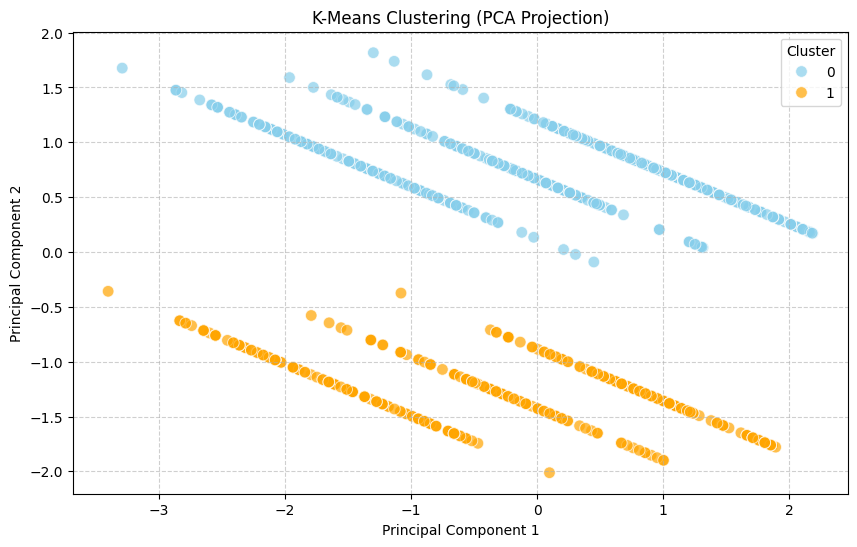

In [101]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='cluster', 
    data=df, 
    palette=['skyblue', 'orange'], 
    alpha=0.7, 
    s=70
)
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [102]:
sil_score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.394


In [107]:
df_compare = pd.DataFrame({
    'survived': y['survived'],
    'cluster': df['cluster']
})


pd.crosstab(df_compare['cluster'], df_compare['survived'])

survived,0,1
cluster,,
0,523,135
1,96,292


The K-means clustering algorithm was not given the survival labels, yet it still produced two groups that roughly align with real survival outcomes, meaning the algorithm captured meaningful structure in the data.

However, there’s overlap, both clusters contain a mix of survivors and non-survivors, showing that the separation isn’t perfect, which is expected since survival depends on additional factors not included

#### Discussion: Supervised vs Unsupervised Learning

Supervised and unsupervised learning differ mainly in their objectives and data requirements. Supervised learning uses labeled data, meaning each input has a known output. The goal is to train a model to learn the relationship between inputs and outputs so it can make accurate predictions on new data.

On the other hand, unsupervised learning uses unlabeled data, where no outcomes are provided. Its goal is to discover hidden patterns or natural groupings within the data rather than make predictions.